In [9]:
import warnings

# 忽略特定类型的警告
warnings.filterwarnings("ignore", message="The parameter 'tokenizer' will not be used since 'analyzer' != 'word'", category=UserWarning)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
import jieba
import pandas as pd

all_file = './data/all.csv'
all_data = pd.read_csv(all_file, header=None,names=['label', 'text'])

def chinese_tokenizer(text):
    return [list(jieba.cut(text))]

# 初始化vectorizer, 使用的是bag-of-word 最基礎的 CountVectorizer
vectorizer = CountVectorizer(analyzer='char',  tokenizer=chinese_tokenizer)

# 將 text 轉換成 bow 格式
corpus = all_data['text'].str.replace(' ', '').values

text = vectorizer.fit_transform(corpus)
# print(len(text.toarray()))

# # 查看词汇表
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Vocabulary num:", len(vectorizer.get_feature_names_out()))

# # 查看词频矩阵
print("Word counts matrix:")
print(text.toarray())


train_text, test_text, train_label, test_label= train_test_split(text, all_data['label'], test_size=0.1, random_state=42)


# 實例化(Instantiate) 這個 Naive Bayes Classifier
MNB_model = MultinomialNB()

# 把資料給它，讓他根據貝氏定理，去算那些機率。
MNB_model.fit(train_text, train_label)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Vocabulary: ['0' '2' '5' ... '，' '：' '？']
Vocabulary num: 5114
Word counts matrix:
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


MultinomialNB()

cross valid score

In [15]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mnb_scores = cross_val_score(MNB_model,train_text,train_label,cv=kf,scoring='accuracy')
cnt = 0
for s in mnb_scores:
    cnt+=1
    print("-" * 45)
    print(
        "| end of epoch {:3d} | valid accuracy {:8.3f} |".format(cnt, s)
    )
print("-" * 45)
print("The mean of valid accuracy ", mnb_scores.mean())

---------------------------------------------
| end of epoch   1 | valid accuracy    0.556 |
---------------------------------------------
| end of epoch   2 | valid accuracy    0.547 |
---------------------------------------------
| end of epoch   3 | valid accuracy    0.575 |
---------------------------------------------
| end of epoch   4 | valid accuracy    0.556 |
---------------------------------------------
| end of epoch   5 | valid accuracy    0.564 |
---------------------------------------------
| end of epoch   6 | valid accuracy    0.582 |
---------------------------------------------
| end of epoch   7 | valid accuracy    0.573 |
---------------------------------------------
| end of epoch   8 | valid accuracy    0.573 |
---------------------------------------------
| end of epoch   9 | valid accuracy    0.565 |
---------------------------------------------
| end of epoch  10 | valid accuracy    0.576 |
---------------------------------------------
The mean of valid accura

[[457  54 112  61]
 [128 138 146  60]
 [128  68 635  89]
 [ 88  48 134 202]]
0.5620094191522763


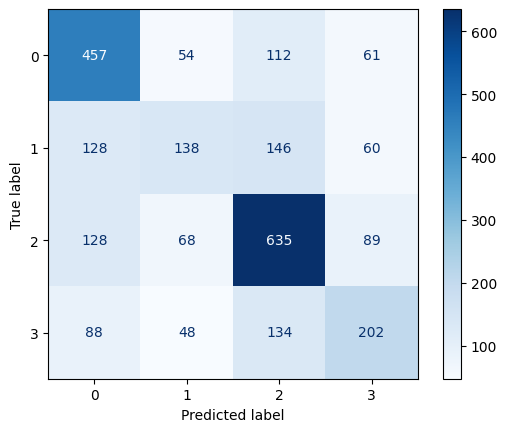

In [13]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support,ConfusionMatrixDisplay
mnb_predict = MNB_model.predict(test_text)
print(confusion_matrix(test_label, mnb_predict))
evaluation = precision_recall_fscore_support(test_label, mnb_predict, average='macro')
mnb_acc = accuracy_score(test_label, mnb_predict)
print(mnb_acc)
display = ConfusionMatrixDisplay(confusion_matrix(test_label, mnb_predict)).plot(cmap='Blues')

In [14]:
s = '窮秋曠野行人絕，馬首東來知是誰'
test_text_pos = vectorizer.transform([s.replace(' ', '')])
print(MNB_model.predict(test_text_pos))

[4]
